<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/21_1%ED%95%99%EA%B8%B0_%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0_%EC%B6%9C%EC%84%9D%EA%B3%BC%EC%A0%9C%EB%AC%BC(%EB%B0%95%EC%8A%B9%ED%9D%AC%2C_202035_368335).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#출석과제물
>1970년 1분기 ~ 2020년 4분기까지 분기별 실질 제조업 GDP의 원계열과 계절조정계열에 대한 다음 문제에 답하시오.

## 1번
>분기 제조업 GDP의 원계열과 계절조정계열에 대한 시계열도표를 같이 그리고, 특징을 변동요인 중심으로 기술하시오.(5점)

In [4]:
#사용할 패키지 불러오기
install.packages('mFilter')
library(mFilter)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
#개인 깃허브 계정의 파일을 저장해 읽어옴
#  제조업 GDP, GDP  원계열
url_o = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/%EA%B2%BD%EC%A0%9C%ED%99%9C%EB%8F%99%EB%B3%84%20GDP(%EC%9B%90%EA%B3%84%EC%97%B4%2C%20%EC%8B%A4%EC%A7%88%2C%20%EB%B6%84%EA%B8%B0)_%EC%A0%9C%EC%A1%B0%EC%97%85.csv"
gdp_o = url_o %>% read.csv() %>% ts(start=1970, frequency=4)
gdp_o %>% tail()

,gdp_m,gdp
2019 Q3,124058.6,463085.9
2019 Q4,131452.4,487427.9
2020 Q1,117204.1,443200.4
2020 Q2,112918.2,448714.8
2020 Q3,123191.8,457856.0
2020 Q4,131792.1,481478.4


In [6]:
#  제조업 GDP, GDP  계절조정계열
url_sa = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/%EA%B2%BD%EC%A0%9C%ED%99%9C%EB%8F%99%EB%B3%84%20GDP(%EA%B3%84%EC%A0%88%EC%A1%B0%EC%A0%95%2C%20%EC%8B%A4%EC%A7%88%2C%20%EB%B6%84%EA%B8%B0)_%EC%A0%9C%EC%A1%B0%EC%97%85.csv"
gdp_sa = url_sa %>% read.csv() %>% ts(start=1970, frequency=4)
gdp_sa %>% head()

,gdp_m_sa,gdp_sa
1970 Q1,1358.9,17109.7
1970 Q2,1440.9,17797.7
1970 Q3,1503.6,17907.8
1970 Q4,1685.2,19287.5
1971 Q1,1672.8,19395.7
1971 Q2,1747.5,20027.5


In [7]:
#제조업 gdp 원계열, 계절조정 gdp, 계절조정계열 데이터 합치기
#제조업 gdp 원계열 : gdp_m
gdp_m_o <- gdp_o[, 1]
#제조업 계절조정 gdp : gdp_m_sa
gdp_m_sa <- gdp_sa[, 1]

#합친 데이터 : gdp
gdp <- cbind(gdp_m_o, gdp_m_sa)
head(gdp)

,gdp_m_o,gdp_m_sa
1970 Q1,1225.4,1358.9
1970 Q2,1453.9,1440.9
1970 Q3,1521.6,1503.6
1970 Q4,1787.7,1685.2
1971 Q1,1526.1,1672.8
1971 Q2,1769.2,1747.5


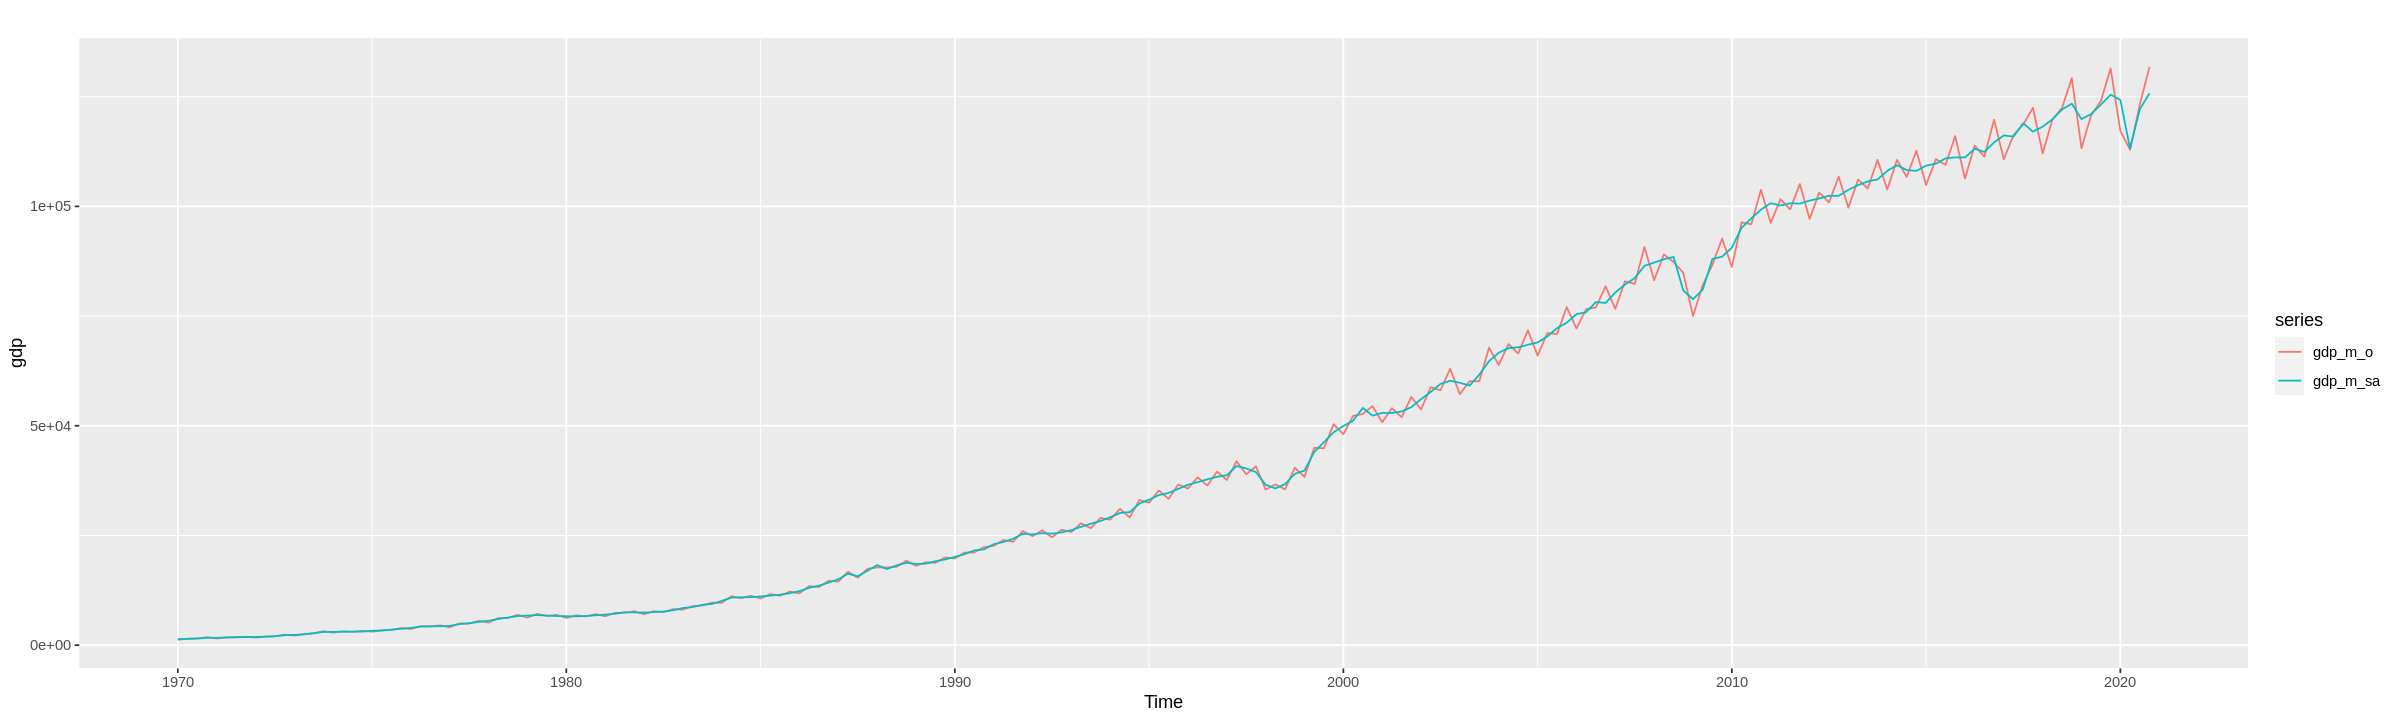

In [17]:
#분기 제조업 GDP의 원계열과 계절조정계열 시계열도표
autoplot(gdp)
#그래프 크기 조정
options(warn=-1,repr.plot.width = 20, repr.plot.height = 6)

##2번
>분기 제조업 GDP의 원계열과 계절조정계열에 대한 스펙트럼과 같이 그래프를 표현하고 그 특징을 시계열들의 변동요인과 연계해서 설명하시오. (10점)

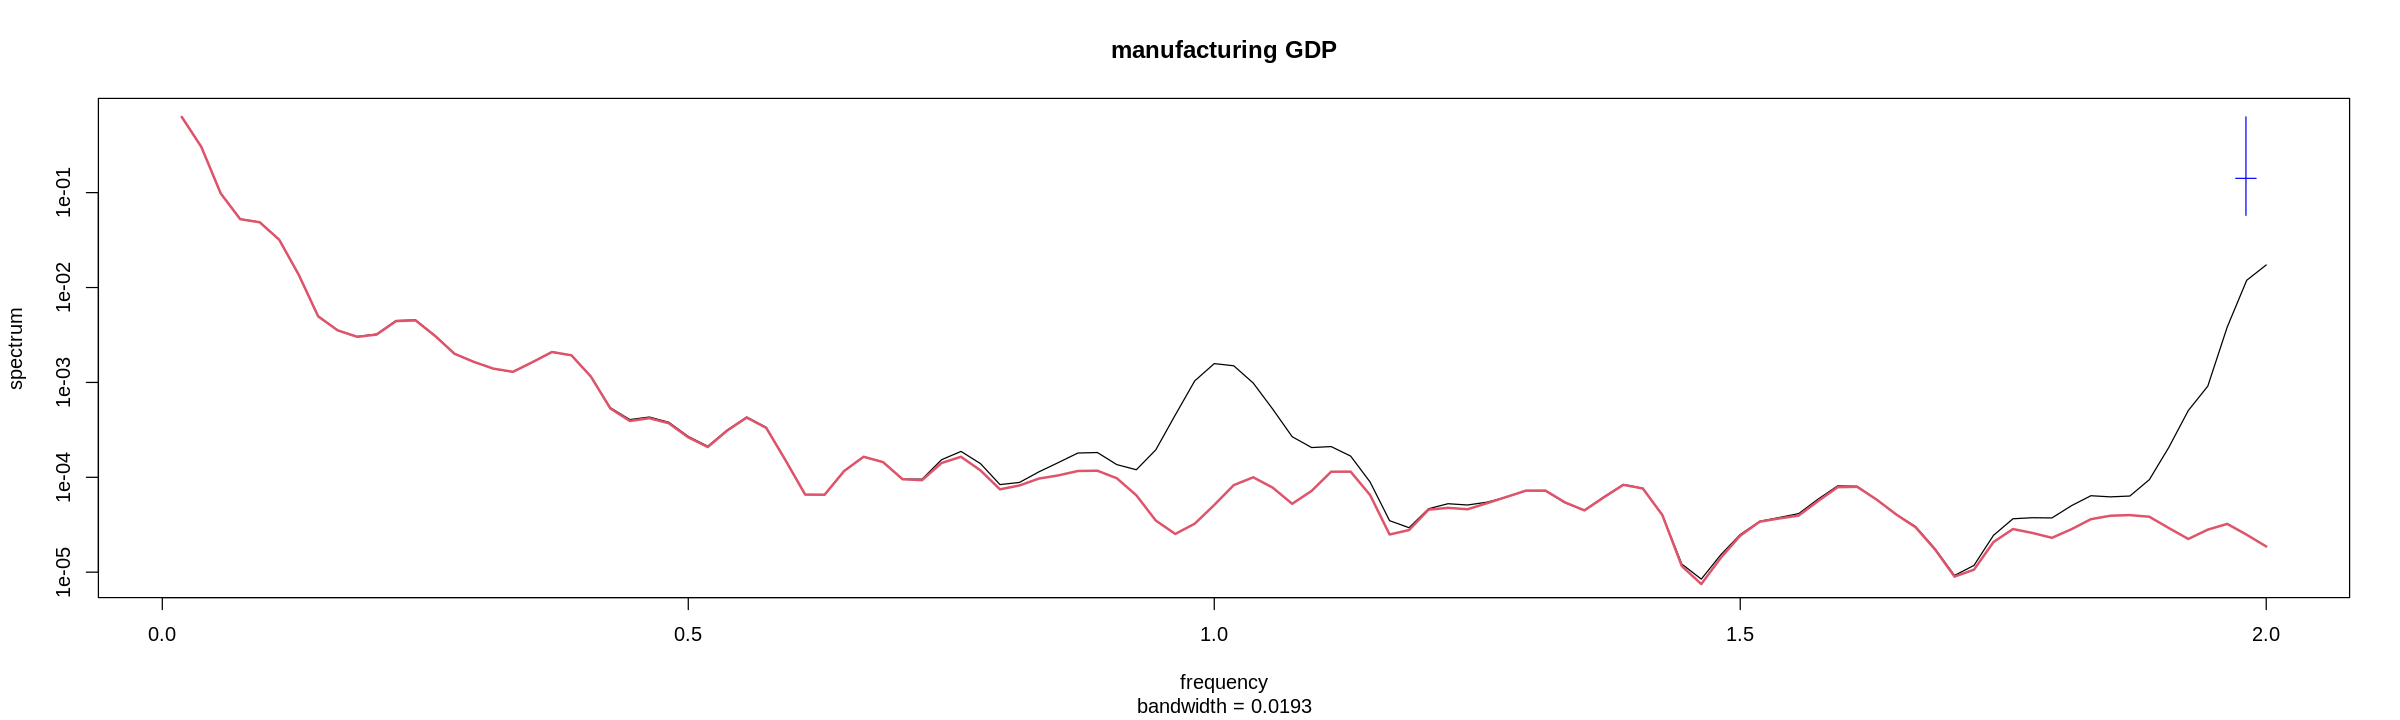

In [27]:
#분기 제조업 gdp원계열 : 검은 선, 계절조정계열 : 빨간 선
gdp_m_o %>% log() %>% spectrum(spans=c(3,3), main="manufacturing GDP")
gdp_m_sa %>% log() %>% spectrum(spans=c(3,3), add=TRUE, col=2, lwd=2) 

##3번
분기 제조업 GDP의 계정조절계열의 로그 계열과 로그차분 계열에 대해 다음을 구하시오.
>
1. 두 계열의 상관도표와 부분상관도표를 작성하고 그 특징을 정리하시오.(5점)

2. 로그차분 계열의 ARIMA 모형을 작성하고, 향후 1년을 예측하시오.(10점)


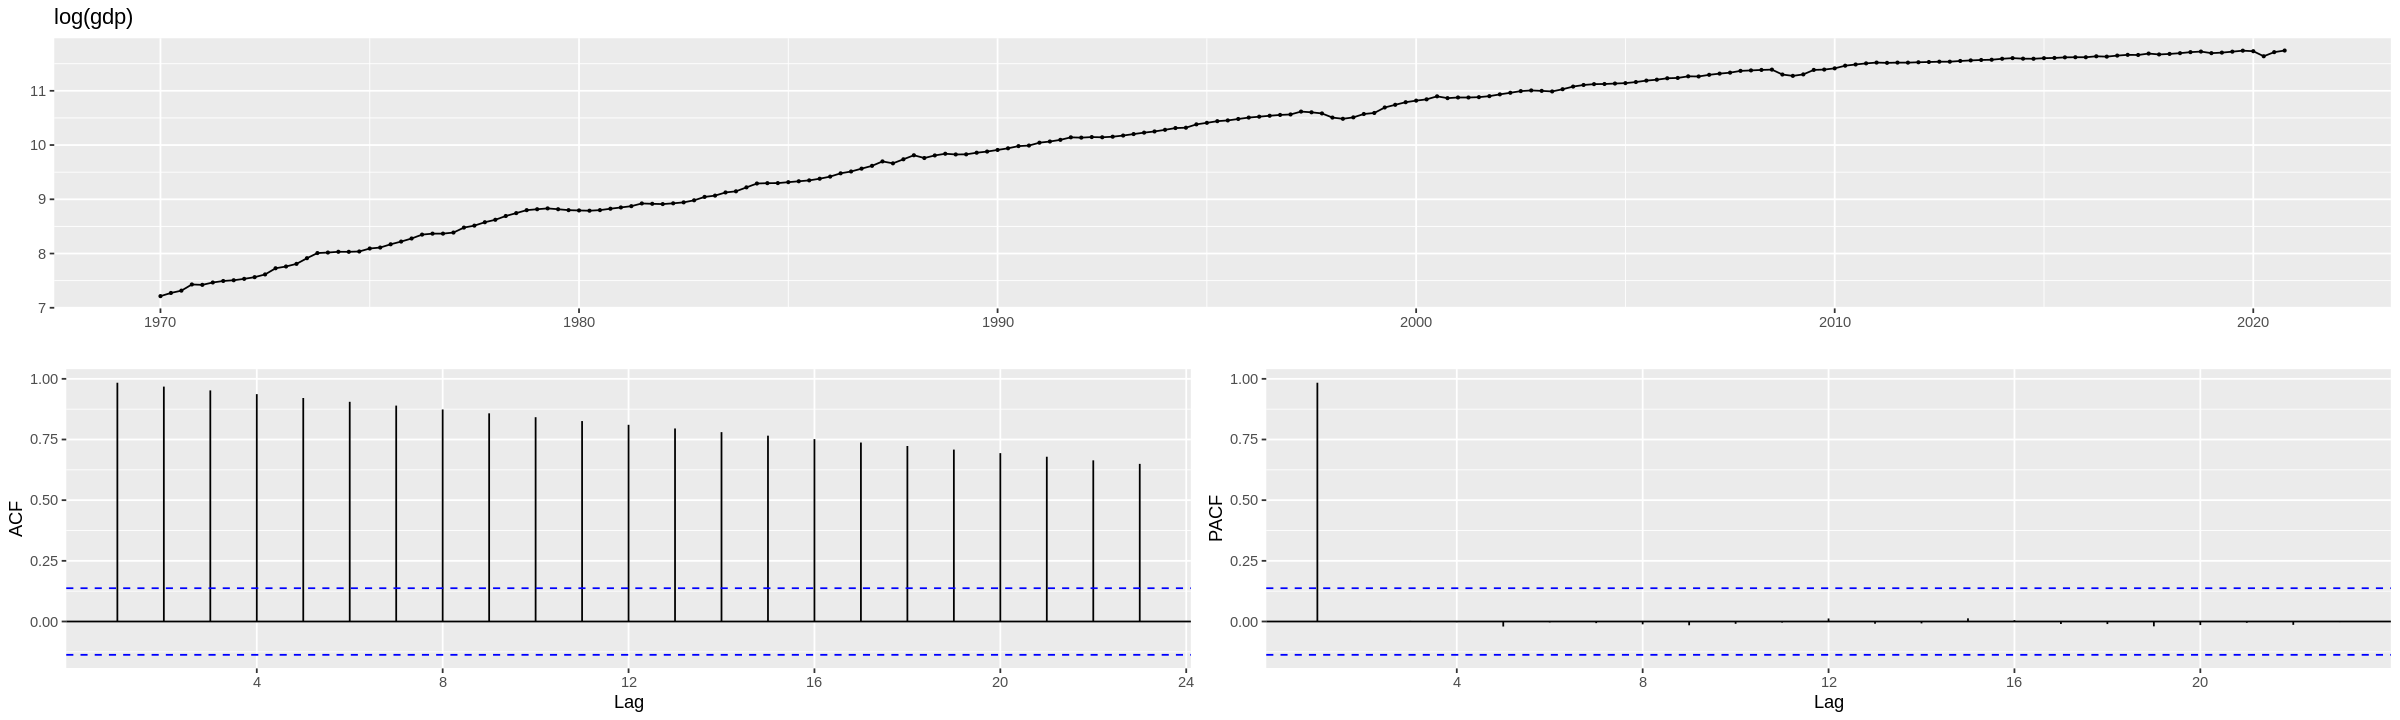

In [30]:
#분기 제조업 GDP의 계절조정계열-로그계열의 시계열모형, 상관도표, 부분상관도표
gdp_m_sa %>% log() %>% ggtsdisplay(main="log(gdp)")

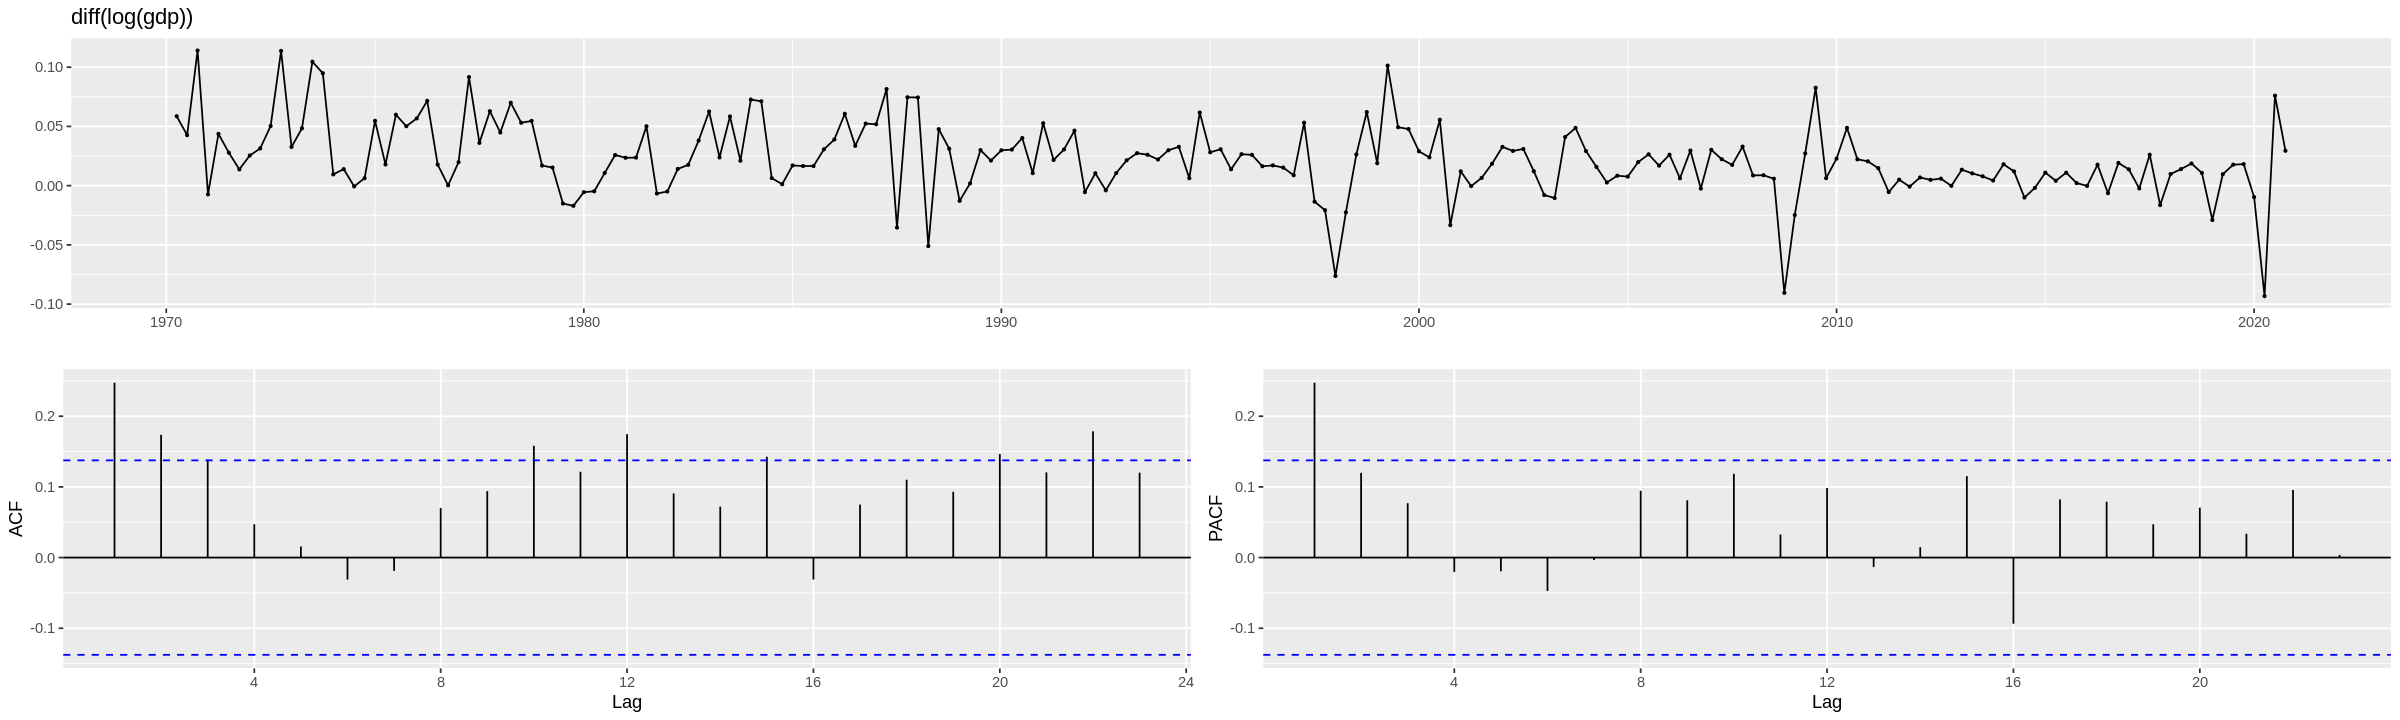

In [11]:
#분기 제조업 GDP의 계절조정계열-로그차분계열의 시계열모형, 상관도표, 부분상관도표
gdp_m_sa %>% log() %>% diff() %>% ggtsdisplay(main="diff(log(gdp))") 

2. 로그차분 계열의 ARIMA 모형을 작성하고, 향후 1년을 예측하시오.(10점)


In [12]:
#패키지 가져오기
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
#제조업 계절조정계열 GDP 로그1차 차분계열의 ARIMA모형 추정
gdp_m_sa_fit = arima(log(gdp_m_sa), order=c(0, 1, 1))
summary(gdp_m_sa_fit)


Call:
arima(x = log(gdp_m_sa), order = c(0, 1, 1))

Coefficients:
         ma1
      0.3666
s.e.  0.0564

sigma^2 estimated as 0.001169:  log likelihood = 397.15,  aic = -790.3

Training set error measures:
                     ME       RMSE        MAE       MPE      MAPE      MASE
Training set 0.01625459 0.03411445 0.02464222 0.1745549 0.2561541 0.8584779
                   ACF1
Training set -0.1630264


In [14]:
#제조업 계절조정계열 GDP의 로그 1차 차분계열의 ARIMA모형의 과대적합 검토
gdp_m_sa_fit1 = arima(log(gdp_m_sa), order=c(1, 1, 1))
summary(gdp_m_sa_fit1)
gdp_m_sa_fit2 = arima(log(gdp_m_sa), order=c(0, 1, 2))
summary(gdp_m_sa_fit2)


Call:
arima(x = log(gdp_m_sa), order = c(1, 1, 1))

Coefficients:
         ar1     ma1
      0.9742  0.0417
s.e.     NaN  0.0951

sigma^2 estimated as 0.001392:  log likelihood = 378,  aic = -750.01

Training set error measures:
                       ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.0004957596 0.03721941 0.02516823 0.005350945 0.2577704 0.8768027
                   ACF1
Training set -0.4750416

Call:
arima(x = log(gdp_m_sa), order = c(0, 1, 2))

Coefficients:
         ma1     ma2
      0.3546  0.2575
s.e.  0.0706  0.0646

sigma^2 estimated as 0.001086:  log likelihood = 404.61,  aic = -803.22

Training set error measures:
                     ME      RMSE        MAE      MPE      MAPE      MASE
Training set 0.01389208 0.0328773 0.02371626 0.149036 0.2462267 0.8262194
                   ACF1
Training set -0.1409587


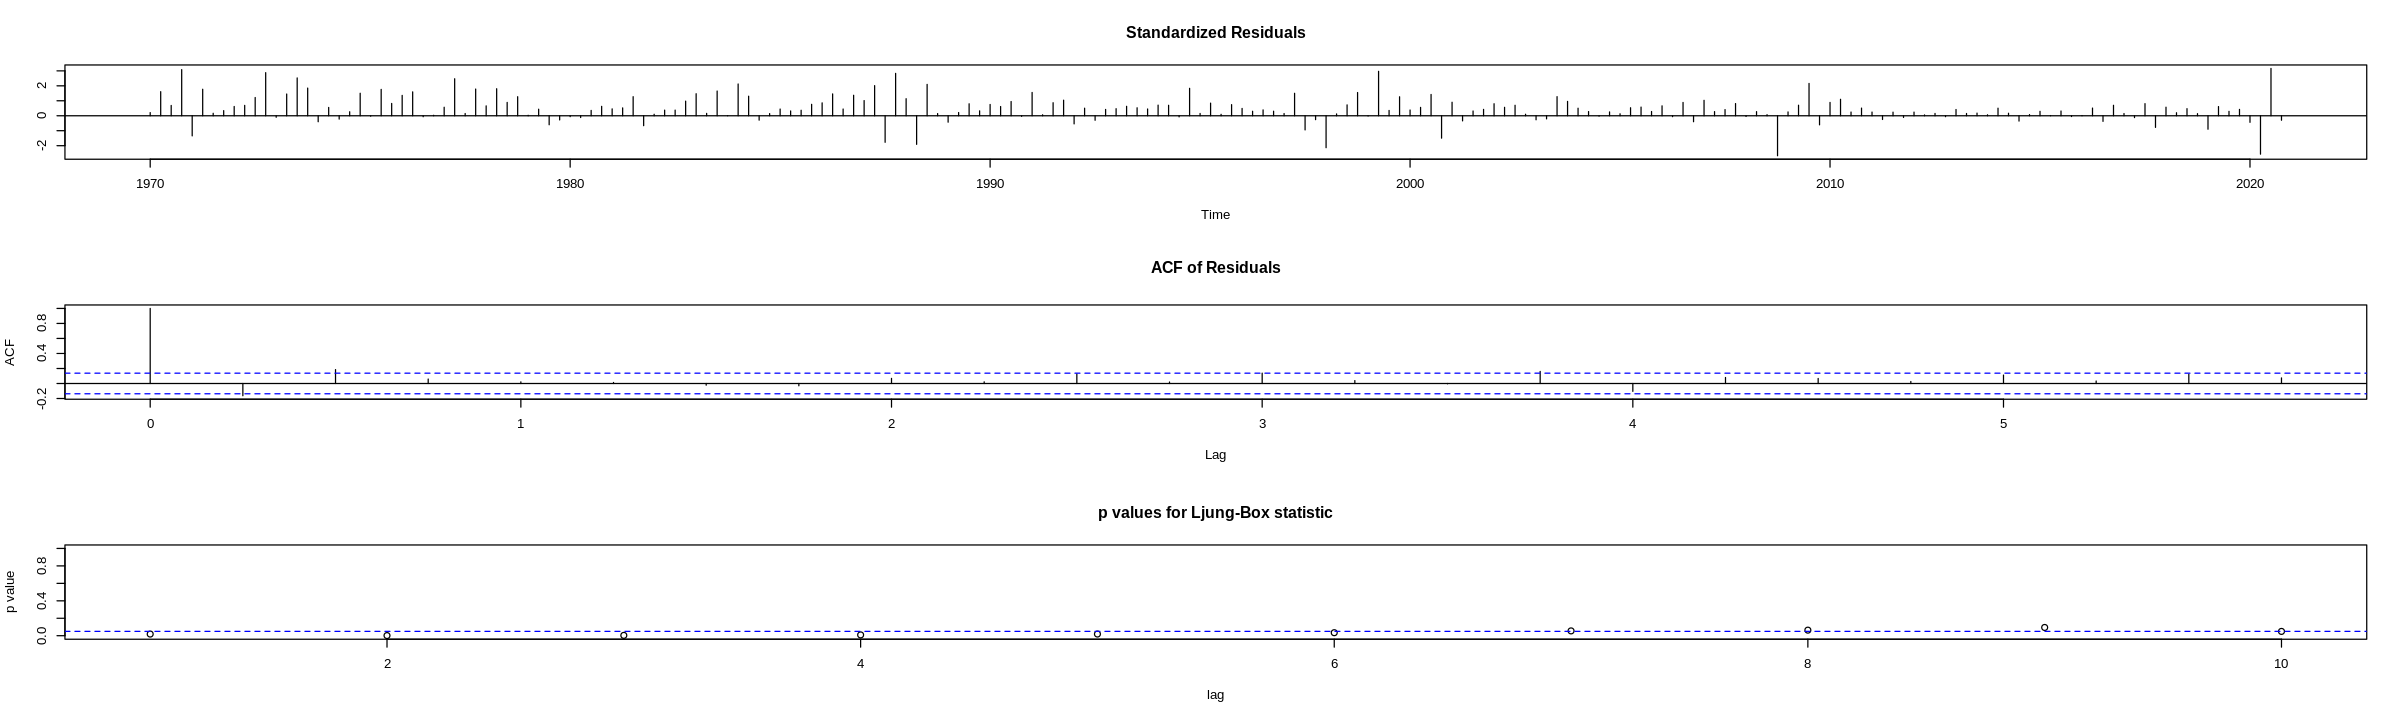

In [21]:
#제조업 계절조정계열 GDP -로그 1차 차분계열의 ARIMA모형의 진단(예측)
tsdiag(gdp_m_sa_fit)

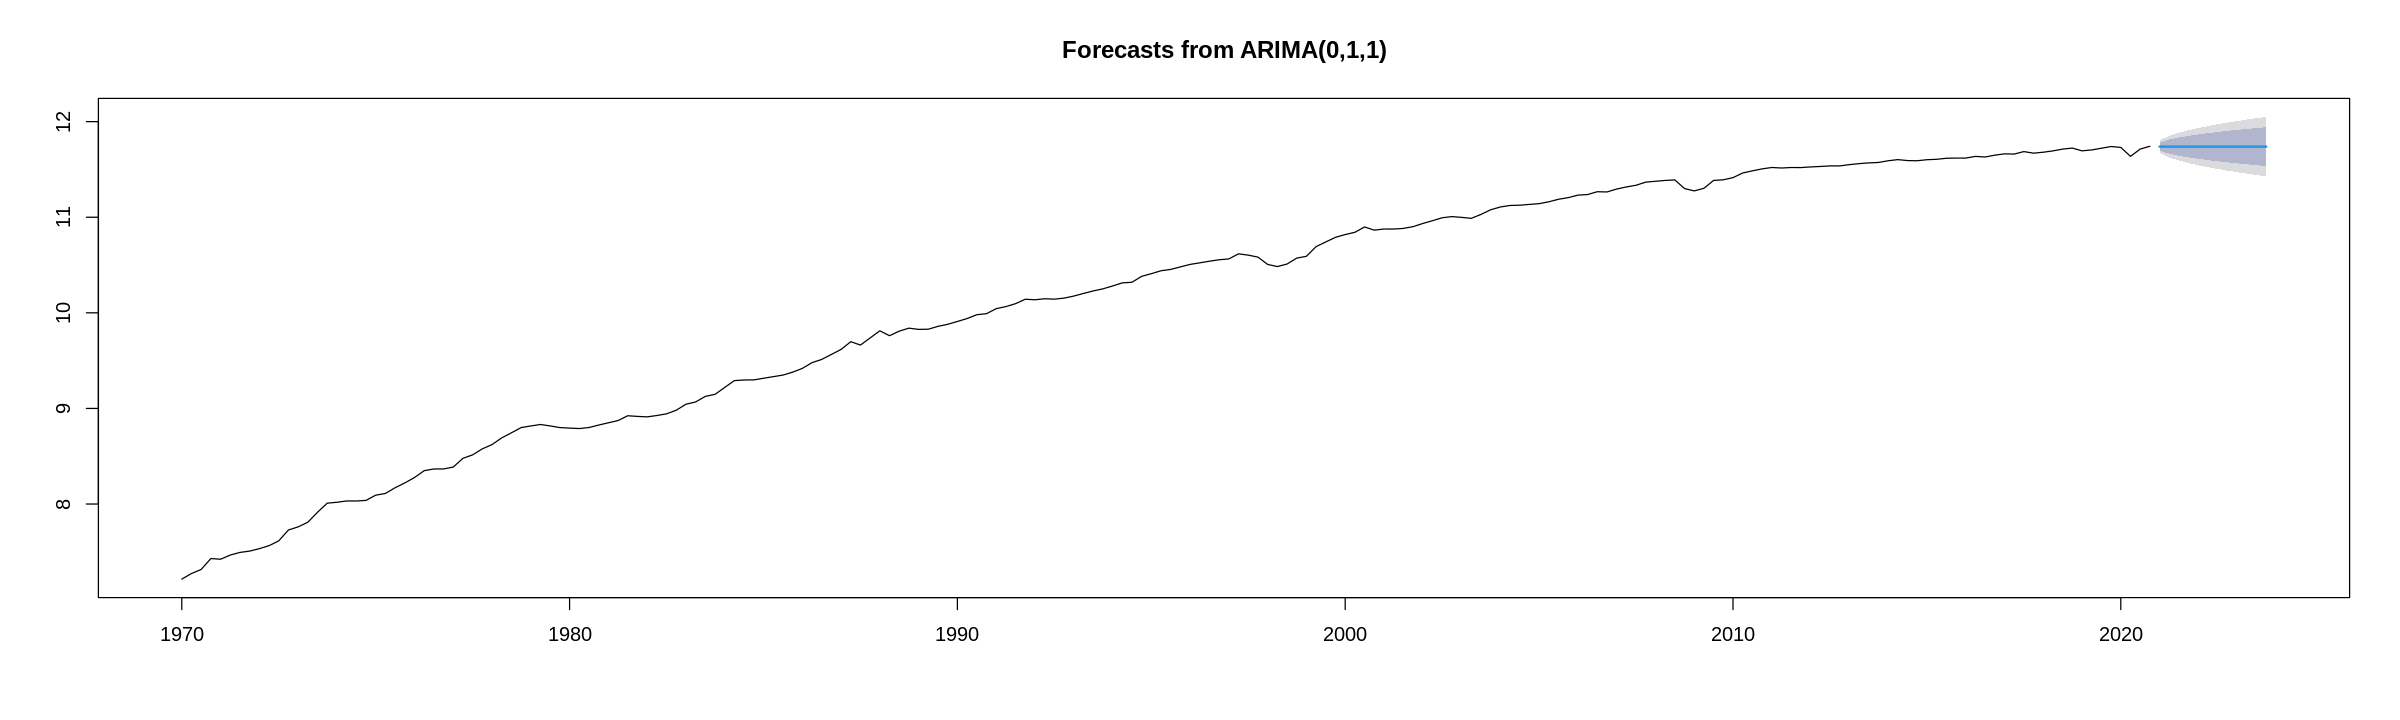

In [19]:
#제조업 계절조정계열 GDP -로그 1차 차분계열의 ARIMA모형의 예측
plot(forecast(gdp_m_sa_fit, h=12))